In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
!wget https://static-content.springer.com/esm/art%3A10.1186%2Fs40561-022-00192-z/MediaObjects/40561_2022_192_MOESM1_ESM.xlsx

--2023-06-03 11:34:11--  https://static-content.springer.com/esm/art%3A10.1186%2Fs40561-022-00192-z/MediaObjects/40561_2022_192_MOESM1_ESM.xlsx
Resolving static-content.springer.com (static-content.springer.com)... 151.101.0.95, 151.101.64.95, 151.101.128.95, ...
Connecting to static-content.springer.com (static-content.springer.com)|151.101.0.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68124 (67K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘40561_2022_192_MOESM1_ESM.xlsx’

40561_2022_192_MOES 100%[===================>]  66.53K  --.-KB/s    in 0.01s   

2023-06-03 11:34:12 (4.56 MB/s) - ‘40561_2022_192_MOESM1_ESM.xlsx’ saved [68124/68124]



In [3]:
turkish_df = pd.read_excel('40561_2022_192_MOESM1_ESM.xlsx')


print(turkish_df.head())

  stdID  mid-term  final                               faculty  \
0  std1        60     68  İKTİSADİ VE İDARİ BİLİMLER FAKÜLTESİ   
1  std2        34     67     BEDEN EĞİTİMİ VE SPOR YÜKSEKOKULU   
2  std3        25     75                      EĞİTİM FAKÜLTESİ   
3  std4        50     66                      EĞİTİM FAKÜLTESİ   
4  std5        50     66                      EĞİTİM FAKÜLTESİ   

                                         department  
0                   Siyaset Bilimi ve Kamu Yönetimi  
1                               Antrenörlük Eğitimi  
2  Bilgisayar ve Öğretim Teknolojileri Öğretmenliği  
3                      Sosyal Bilgiler Öğretmenliği  
4                          Okul Öncesi Öğretmenliği  


Educational data mining prediction of students' academic performance using machine learning algorithms

| Faculty of Education                               | 404  |
|---------------------------------------------------|------|
| Faculty of Arts and Sciences                      | 319  |
| Faculty of Health Sciences                        | 296  |
| Faculty of Economics and Administrative Sciences  | 221  |
| School of Physical Education and Sports           | 192  |
| Faculty of Engineering and Architecture           | 116  |
| School of Physical Therapy and Rehabilitation     | 92   |
| Faculty of Islamic Sciences                       | 88   |
| Faculty of Agriculture                            | 68   |
| Faculty of Fine Arts                              | 30   |
| Vocational School of Applied Sciences             | 28   |
| Total Number of Students                          | 1854 |


Turkish Language-I course in the 2019–2020 Fall Semester

Midterm and final exam grades are ranging from 0 to 100. In this system, the end-of-semester achievement grade is calculated by taking 40% of the midterm exam and 60% of the final exam. Students with achievement grade below 60 are unsuccessful and those above 60 are successful. The midterm exam is usually held in the middle of the academic semester and the final exam is held at the end of the semester

In [4]:
turkish_df

,stdID,mid-term,final,faculty,department
0,std1,60,68,İKTİSADİ VE İDARİ BİLİMLER FAKÜLTESİ,Siyaset Bilimi ve Kamu Yönetimi
1,std2,34,67,BEDEN EĞİTİMİ VE SPOR YÜKSEKOKULU,Antrenörlük Eğitimi
2,std3,25,75,EĞİTİM FAKÜLTESİ,Bilgisayar ve Öğretim Teknolojileri Öğretmenliği
3,std4,50,66,EĞİTİM FAKÜLTESİ,Sosyal Bilgiler Öğretmenliği
4,std5,50,66,EĞİTİM FAKÜLTESİ,Okul Öncesi Öğretmenliği
...,...,...,...,...,...
1849,std1850,70,84,KAMAN UYGULAMALI BİLİMLER YÜKSEKOKULU,Yönetim Bilişim Sistemleri
1850,std1851,60,60,KAMAN UYGULAMALI BİLİMLER YÜKSEKOKULU,Yönetim Bilişim Sistemleri
1851,std1852,56,76,KAMAN UYGULAMALI BİLİMLER YÜKSEKOKULU,Yönetim Bilişim Sistemleri
1852,std1853,56,62,KAMAN UYGULAMALI BİLİMLER YÜKSEKOKULU,Yönetim Bilişim Sistemleri


In [5]:
encoder = LabelEncoder()
turkish_df['faculty'] = encoder.fit_transform(turkish_df['faculty'])
turkish_df['department'] = encoder.fit_transform(turkish_df['department'])

In [6]:
turkish_df['achievement_grade'] = 0.4 * turkish_df['mid-term'] + 0.6 * turkish_df['final']

In [7]:
def categorize_grade(grade):
    if grade < 32.5:
        return 1
    elif grade < 55:
        return 2
    elif grade < 77.5:
        return 3
    else:
        return 4

turkish_df['final_grade'] = turkish_df['final'].apply(categorize_grade)

In [8]:
turkish_df

,stdID,mid-term,final,faculty,department,achievement_grade,final_grade
0,std1,60,68,9,26,64.8,3
1,std2,34,67,0,0,53.8,3
2,std3,25,75,1,6,55.0,3
3,std4,50,66,1,27,59.6,3
4,std5,50,66,1,23,59.6,3
...,...,...,...,...,...,...,...
1849,std1850,70,84,4,37,78.4,4
1850,std1851,60,60,4,37,60.0,3
1851,std1852,56,76,4,37,68.0,3
1852,std1853,56,62,4,37,59.6,3


In [9]:
X = turkish_df[['mid-term', 'final', 'faculty', 'department']]
y = turkish_df['final_grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Shape: "+str(X_train.shape))
print("Testing Shape: "+str(X_test.shape))

Training Shape: (1483, 4)
Testing Shape: (371, 4)


## Decision Trees

In [10]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred, average='weighted')
recall_dt = recall_score(y_test, y_pred, average='weighted')
f1_dt = f1_score(y_test, y_pred, average='weighted')

# Generate classification report
report = classification_report(y_test, y_pred)
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)
print("Classification Report:")
print(report)

Random Forest Classifier Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00       180
           4       1.00      1.00      1.00       139

    accuracy                           1.00       371
   macro avg       1.00      1.00      1.00       371
weighted avg       1.00      1.00      1.00       371



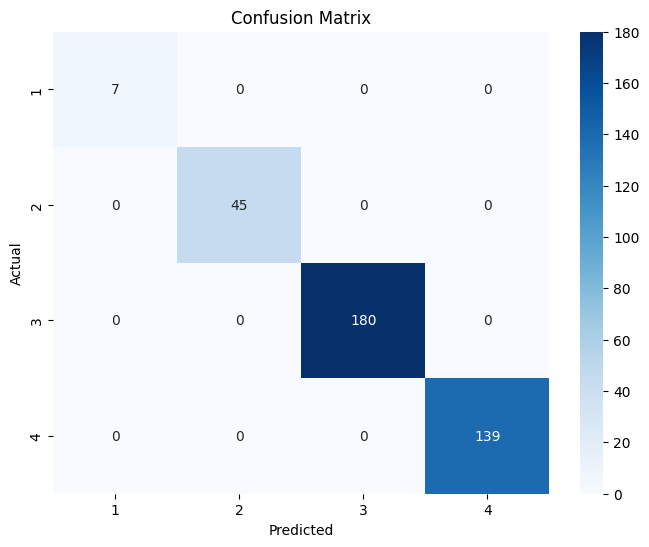

In [11]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['1', '2', '3', '4']

# Create a DataFrame for the confusion matrix
confusion_df = pd.DataFrame(confusion, index=class_labels, columns=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
results = pd.DataFrame({'Actual Grade': y_test, 'Predicted Grade': y_pred})


print(results)

      Actual Grade  Predicted Grade
233              3                3
450              3                3
1240             3                3
1693             3                3
411              4                4
...            ...              ...
471              2                2
777              3                3
413              3                3
271              4                4
184              3                3

[371 rows x 2 columns]


## Random Forest

In [13]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred, average='weighted')
recall_rf = recall_score(y_test, y_pred, average='weighted')
f1_rf = f1_score(y_test, y_pred, average='weighted')

# Generate classification report
report = classification_report(y_test, y_pred)
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Classification Report:")
print(report)

Random Forest Classifier Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00       180
           4       1.00      1.00      1.00       139

    accuracy                           1.00       371
   macro avg       1.00      1.00      1.00       371
weighted avg       1.00      1.00      1.00       371



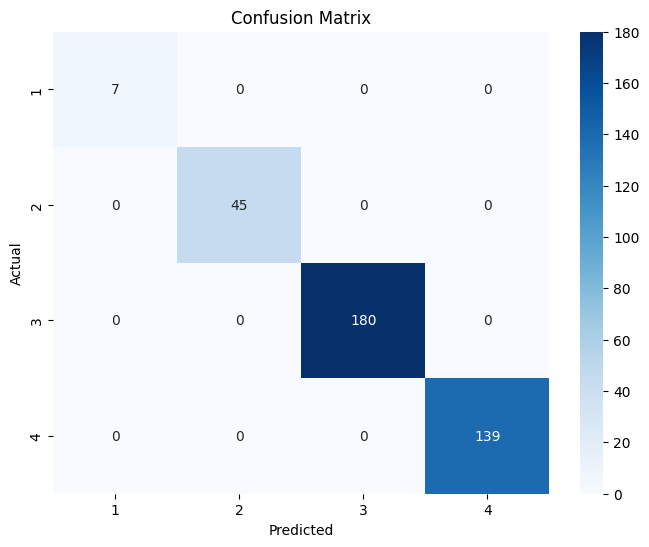

In [14]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['1', '2', '3', '4']

# Create a DataFrame for the confusion matrix
confusion_df = pd.DataFrame(confusion, index=class_labels, columns=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Logistic Regression

In [15]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred, average='weighted')
recall_lr = recall_score(y_test, y_pred, average='weighted')
f1_lr = f1_score(y_test, y_pred, average='weighted')

# Generate classification report
report = classification_report(y_test, y_pred)
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)
print("Classification Report:")
print(report)

Random Forest Classifier Metrics:
Accuracy: 0.8221024258760108
Precision: 0.8085963954334183
Recall: 0.8221024258760108
F1 Score: 0.8026466227771377
Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.43      0.46         7
           2       0.50      0.20      0.29        45
           3       0.77      0.94      0.84       180
           4       0.98      0.89      0.93       139

    accuracy                           0.82       371
   macro avg       0.69      0.61      0.63       371
weighted avg       0.81      0.82      0.80       371



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


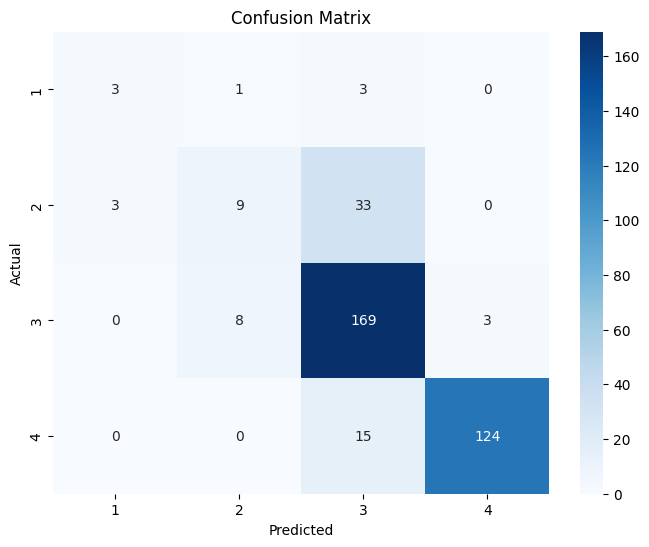

In [16]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['1', '2', '3', '4']

# Create a DataFrame for the confusion matrix
confusion_df = pd.DataFrame(confusion, index=class_labels, columns=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Support Vector Machine (SVM)

In [17]:
classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred, average='weighted')
recall_svm = recall_score(y_test, y_pred, average='weighted')
f1_svm = f1_score(y_test, y_pred, average='weighted')

# Generate classification report
report = classification_report(y_test, y_pred)
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)
print("Classification Report:")
print(report)

Random Forest Classifier Metrics:
Accuracy: 0.9622641509433962
Precision: 0.9663975952921917
Recall: 0.9622641509433962
F1 Score: 0.9604543692913182
Classification Report:
              precision    recall  f1-score   support

           1       0.70      1.00      0.82         7
           2       1.00      0.71      0.83        45
           3       0.94      1.00      0.97       180
           4       1.00      0.99      1.00       139

    accuracy                           0.96       371
   macro avg       0.91      0.93      0.91       371
weighted avg       0.97      0.96      0.96       371



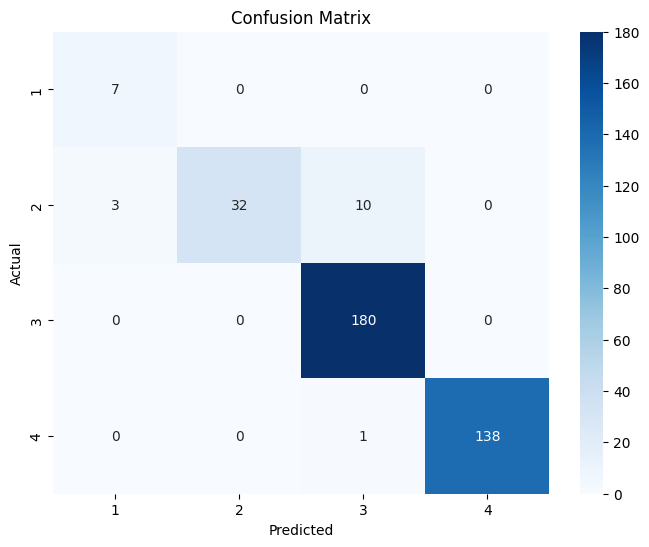

In [18]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['1', '2', '3', '4']

# Create a DataFrame for the confusion matrix
confusion_df = pd.DataFrame(confusion, index=class_labels, columns=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

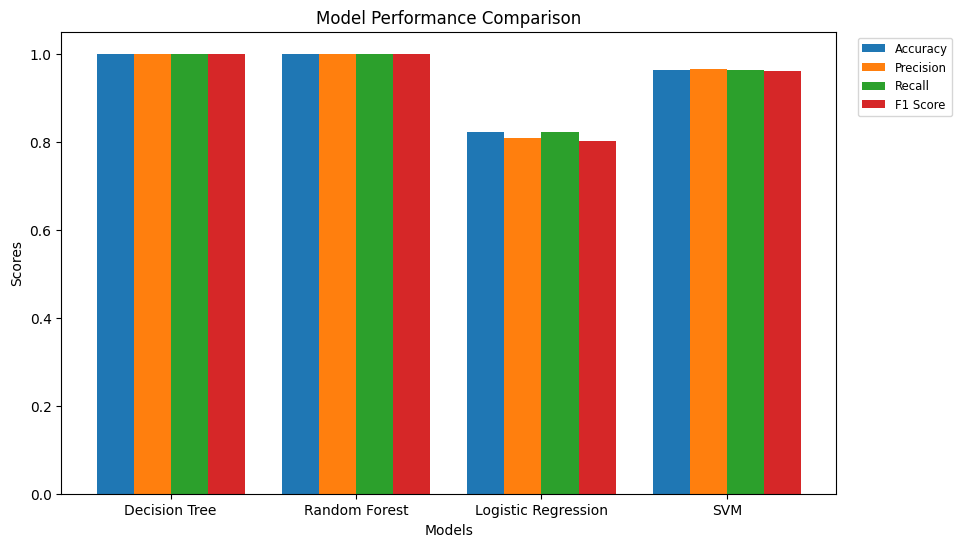

In [19]:
# Evaluation metrics for each model
models = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM']
accuracy = [accuracy_dt, accuracy_rf, accuracy_lr, accuracy_svm]
precision = [precision_dt, precision_rf, precision_lr, precision_svm]
recall = [recall_dt, recall_rf, recall_lr, recall_svm]
f1 = [f1_dt, f1_rf, f1_lr, f1_svm]

# Create a bar plot
x = range(len(models))
width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x, accuracy, width, label='Accuracy')
plt.bar([i + width for i in x], precision, width, label='Precision')
plt.bar([i + 2 * width for i in x], recall, width, label='Recall')
plt.bar([i + 3 * width for i in x], f1, width, label='F1 Score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks([i + 1.5 * width for i in x], models)
plt.legend(fontsize='small', bbox_to_anchor=(1.02, 1.0))
plt.show()